In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, truncnorm, randint
from math import exp

In [52]:
train = pd.read_csv("train.csv").drop(columns=['id'])
test = pd.read_csv("test.csv").drop(columns=['id'])

target_feature = train.iloc[:,30]
train = train.drop(columns = 'diagnosis')

index = train.index
num_rows = len(index)

index = test.index
test_rows = len(index)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              284 non-null    float64
 1   texture_mean             284 non-null    float64
 2   perimeter_mean           284 non-null    float64
 3   area_mean                284 non-null    float64
 4   smoothness_mean          284 non-null    float64
 5   compactness_mean         284 non-null    float64
 6   concavity_mean           284 non-null    float64
 7   concave points_mean      284 non-null    float64
 8   symmetry_mean            284 non-null    float64
 9   fractal_dimension_mean   284 non-null    float64
 10  radius_se                284 non-null    float64
 11  texture_se               284 non-null    float64
 12  perimeter_se             284 non-null    float64
 13  area_se                  284 non-null    float64
 14  smoothness_se            2

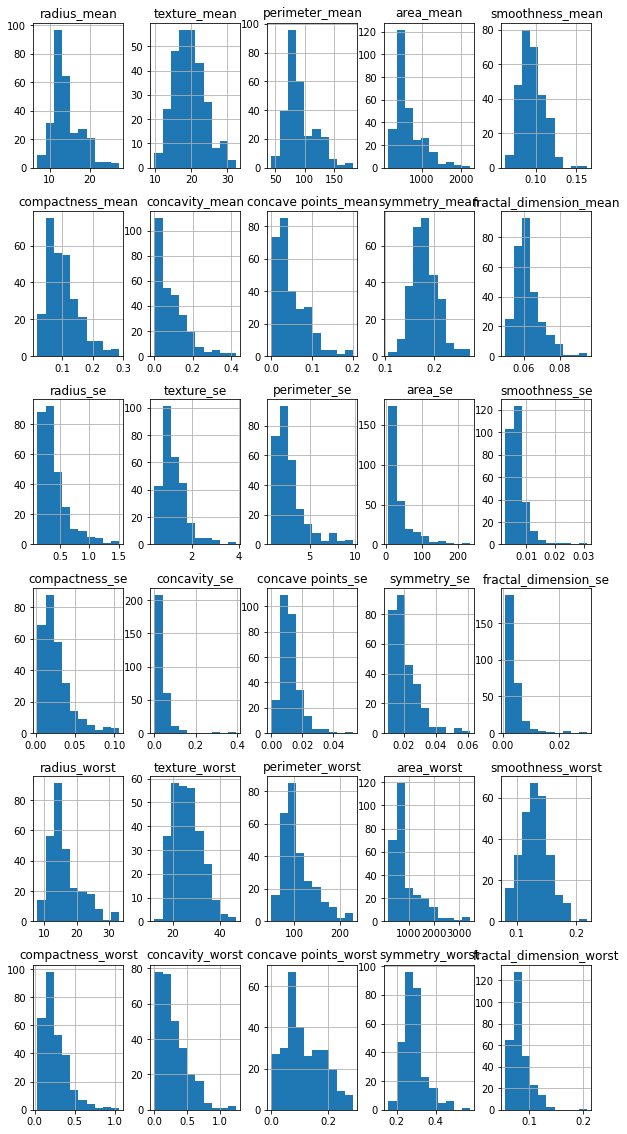

In [53]:
train.hist(figsize=(10,20))
plt.show()

In [54]:
train.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [55]:
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 5: 
            out.append(i)
    print("Outliers:",out)
            
column_counter = 0
    
for column in train:
    out=[]
    Zscore_outlier(train.iloc[:,column_counter])
    median = train.iloc[:,column_counter].median()
    for x in range(num_rows):
        if(train.iloc[x,column_counter] in out):
            train.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1
    
column_counter = 0
    
for column in test:
    out=[]
    Zscore_outlier(test.iloc[:,column_counter])
    median = test.iloc[:,column_counter].median()
    for x in range(test_rows):
        if(test.iloc[x,column_counter] in out):
            test.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1


Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [3.8960000000000004]
Outliers: []
Outliers: [224.1, 233.0]
Outliers: [0.03113, 0.02333]
Outliers: []
Outliers: [0.396, 0.3038]
Outliers: [0.05279]
Outliers: [0.06146]
Outliers: [0.02984, 0.02193, 0.02286]
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [1.058]
Outliers: []
Outliers: []
Outliers: []
Outliers: [0.2075]
Outliers: []
Outliers: []
Outliers: []
Outliers: [2499.0, 2501.0]
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [2.873, 2.5469999999999997]
Outliers: [4.885]
Outliers: [21.98, 18.65]
Outliers: [525.6, 542.2]
Outliers: [0.021769999999999998]
Outliers: [0.1354]
Outliers: [0.1535]
Outliers: [0.0409]
Outliers: [0.07895]
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [4254.0]
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [0.6638]

In [149]:
highest = 0
split = 0
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(train, target_feature, test_size = 0.2, random_state=i) 

    model = GaussianNB()

    pred = model.fit(X_train, y_train).predict(X_test) 

    #auc_score = metrics.roc_auc_score(y_test,pred)
    #score = metrics.accuracy_score(y_test,pred)
    f1 = metrics.f1_score(y_test,pred)
    if(f1 > highest):
        highest = f1
        split = i
    #print(auc_score)
    #print(score)
    print(i,":",f1)
    
print(split,":",highest)

X_train, X_test, y_train, y_test = train_test_split(train, target_feature, test_size = 0.2, random_state=488) 

0 : 0.888888888888889
1 : 0.9056603773584906
2 : 0.8717948717948718
3 : 0.8717948717948718
4 : 0.909090909090909
5 : 0.9444444444444444
6 : 0.8717948717948718
7 : 0.8936170212765958
8 : 0.9268292682926829
9 : 0.8372093023255814
10 : 0.9411764705882353
11 : 0.875
12 : 0.9230769230769231
13 : 0.8571428571428571
14 : 0.8510638297872342
15 : 0.8695652173913043
16 : 0.888888888888889
17 : 0.9473684210526316
18 : 0.9333333333333333
19 : 0.9473684210526315
20 : 0.92
21 : 0.8648648648648648
22 : 0.9302325581395349
23 : 0.8387096774193549
24 : 0.9333333333333333
25 : 0.9473684210526316
26 : 0.8837209302325582
27 : 0.9767441860465117
28 : 0.8235294117647058
29 : 0.918918918918919
30 : 0.975609756097561
31 : 0.9166666666666666
32 : 0.888888888888889
33 : 0.8484848484848484
34 : 0.888888888888889
35 : 0.8275862068965517
36 : 0.9
37 : 0.9090909090909091
38 : 0.851063829787234
39 : 0.7647058823529413
40 : 0.8571428571428572
41 : 0.9600000000000001
42 : 0.9545454545454546
43 : 0.9189189189189189
44 :

382 : 0.8444444444444444
383 : 0.8205128205128205
384 : 0.8372093023255814
385 : 0.8936170212765957
386 : 0.8636363636363636
387 : 0.9302325581395349
388 : 0.9090909090909091
389 : 0.9189189189189189
390 : 0.8846153846153846
391 : 0.909090909090909
392 : 0.918918918918919
393 : 0.8636363636363636
394 : 0.9361702127659574
395 : 0.8749999999999999
396 : 0.8648648648648648
397 : 0.9130434782608695
398 : 0.9
399 : 1.0
400 : 0.9600000000000001
401 : 1.0
402 : 0.7999999999999999
403 : 0.85
404 : 0.8648648648648648
405 : 0.8108108108108109
406 : 0.9361702127659575
407 : 0.8571428571428571
408 : 0.8400000000000001
409 : 0.9333333333333332
410 : 0.88
411 : 0.9523809523809523
412 : 0.8205128205128205
413 : 0.9259259259259259
414 : 0.9130434782608696
415 : 0.7857142857142857
416 : 0.8571428571428571
417 : 0.8947368421052632
418 : 0.9
419 : 0.9473684210526315
420 : 0.7804878048780488
421 : 0.823529411764706
422 : 0.7999999999999999
423 : 0.8636363636363636
424 : 0.7999999999999999
425 : 0.88888888

In [150]:
pipe = Pipeline([('gnb', GaussianNB(var_smoothing=1e-9))], verbose = True)

model_2 = pipe.fit(X_train,y_train)

pred = model_2.predict(X_test)

auc_score = metrics.roc_auc_score(y_test,pred)
score = metrics.accuracy_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(auc_score)
print(score)
print(f1)

[Pipeline] ............... (step 1 of 1) Processing gnb, total=   0.0s
0.9857142857142857
0.9824561403508771
0.9777777777777777


In [151]:
RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_params = {'var_smoothing': np.arange(1e-8,1e-9,1e-8)}

model_3 = RandomizedSearchCV(pipe, model_params, cv = cv, n_iter = 500, scoring = 'f1')
model_3 = model.fit(X_train,y_train)

pred = model_3.predict(X_test)

auc_score = metrics.roc_auc_score(y_test,pred)
score = metrics.accuracy_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(auc_score)
print(score)
print(f1)

0.9857142857142857
0.9824561403508771
0.9777777777777777


In [152]:
pred = model_2.predict(test)

ouput = pd.DataFrame(data = pred,columns = ["diagnosis"])
ouput.to_csv('output7.csv',index_label = 'id')